In [144]:
import os
import sys
import pandas as pd
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_folder = '../data'
data_files = os.listdir(data_folder)

In [6]:
for file in data_files:
    print("for year "+file[-8:-4]+" : " + file)

for year 2014 : 22306_24.65_73.75_2014.csv
for year 2000 : 22306_24.65_73.75_2000.csv
for year 2012 : 22306_24.65_73.75_2012.csv
for year 2013 : 22306_24.65_73.75_2013.csv
for year 2008 : 22306_24.65_73.75_2008.csv
for year 2005 : 22306_24.65_73.75_2005.csv
for year 2007 : 22306_24.65_73.75_2007.csv
for year 2006 : 22306_24.65_73.75_2006.csv
for year 2009 : 22306_24.65_73.75_2009.csv
for year 2001 : 22306_24.65_73.75_2001.csv
for year 2011 : 22306_24.65_73.75_2011.csv
for year 2004 : 22306_24.65_73.75_2004.csv
for year 2010 : 22306_24.65_73.75_2010.csv
for year 2003 : 22306_24.65_73.75_2003.csv
for year 2002 : 22306_24.65_73.75_2002.csv


In [149]:
year_2014 = pd.read_csv(data_folder+'/'+data_files[0])
year_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8762 entries, 0 to 8761
Data columns (total 35 columns):
Source                      8762 non-null object
Location ID                 8762 non-null object
City                        8762 non-null object
State                       8762 non-null object
Country                     8762 non-null object
Latitude                    8762 non-null object
Longitude                   8762 non-null object
Time Zone                   8762 non-null object
Elevation                   8762 non-null object
Local Time Zone             8762 non-null object
Clearsky DHI Units          8762 non-null object
Clearsky DNI Units          8762 non-null object
Clearsky GHI Units          8762 non-null object
Dew Point Units             8762 non-null object
DHI Units                   8762 non-null object
DHI Perez Units             8762 non-null object
DNI Units                   8762 non-null object
DNI Perez Units             8762 non-null object
GHI Units  

In [123]:
new_columns = year_2014.iloc[1]
year = year_2014[2:]
year.columns =new_columns
year = year.loc[:, year.columns.notnull()]

# for counter,i in enumerate(new_columns):
#     print(i)


year = year.drop(columns=['Year','Month','Day','Minute','Hour','DHI','DNI','Clearsky DHI','Clearsky DNI','Fill Flag'])

In [125]:
year.head()

1,GHI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Snow Depth,Wind Direction,Wind Speed
2,0,0,4,12.751339552289267,957.9305419921875,58.41139916942352,177.55742015012578,1.3668830583200968,0.0,73.88963317871094,4.430836200714111
3,0,0,6,12.196895002047142,957.7622680664062,67.29592773800267,168.03725969433503,1.4700043477445826,0.0,75.10269927978516,4.453418731689453
4,0,0,7,11.806139366268553,957.8780517578125,72.56749007380043,154.41832139803458,1.5719694344243218,0.0,74.26346588134766,4.3355021476745605
5,0,0,7,11.510595990320212,957.6235961914062,75.29933981073673,140.83665499983437,1.6669825069938207,0.0,72.37870025634766,4.2338972091674805
6,0,0,7,11.306806960929293,957.932861328125,76.7992879237338,127.37552025553532,1.7609774282137391,0.0,70.31179809570312,4.197237968444824


In [145]:
x = np.arange(year.shape[0])[0:100]
y = year['GHI'][0:100]

In [142]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='dkumar', api_key='*************************8')

x = np.arange(year.shape[0])
y = year['GHI']
trace = go.Scatter(
    x = x,
    y = y
)

data = [trace]

py.iplot(data, filename='basic-line')



trace = go.Scatter(
    x = x,
    y = y
)

data = [trace]

py.iplot(data, filename='basic-line')

### Heatmap : Correlation plot

In [153]:
year = year.astype('float64')
year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 2 to 8761
Data columns (total 11 columns):
GHI                   8760 non-null float64
Clearsky GHI          8760 non-null float64
Dew Point             8760 non-null float64
Temperature           8760 non-null float64
Pressure              8760 non-null float64
Relative Humidity     8760 non-null float64
Solar Zenith Angle    8760 non-null float64
Precipitable Water    8760 non-null float64
Snow Depth            8760 non-null float64
Wind Direction        8760 non-null float64
Wind Speed            8760 non-null float64
dtypes: float64(11)
memory usage: 752.9 KB


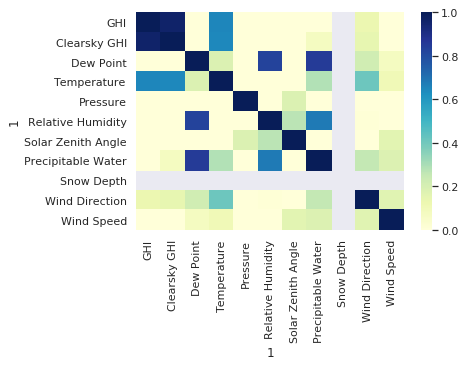

In [166]:
corr_hm = sns.heatmap(year.corr(), 
                xticklabels=year.corr().columns,
                yticklabels=year.corr().columns,vmin=0,vmax=1,cmap="YlGnBu")
# plt.tight_layout()

corr_hm.figure.savefig("../docs/corr_heatmap.png",dpi=200,bbox_inches = "tight")

## XGBOOST Classfier